# Ejemplo de ANN
<br>
<img src="https://media.istockphoto.com/vectors/diagram-of-neuron-anatomy-illustration-of-neuron-anatomy-vector-id1288987219?k=20&m=1288987219&s=170667a&w=0&h=H6_EdKCHtpuf8AFcpzBlZi2jkJibckIO55yPw2sARYE="/>
<br>
<img src="https://marvel-b1-cdn.bc0a.com/f00000000206209/www.imsl.com/sites/imsl/files/image/2021-01/neuralnetwork-fourinputs.png"/>
<br>
<img src="https://d3i71xaburhd42.cloudfront.net/40a17f823b03b455a3ace1e406b2716639fd42bc/3-Figure1-1.png"/>
<br>
<img src="https://encyclopedia.mdpi.cn/FugGSo4y9tDzErRuNqQFLB6WS9eu"/>
<br>

In [ ]:
#IMPORTANDO LIBRERIAS
import tensorflow as tf #LIBRERIA PARA OPERACIONES DE MACHINE LEARNING
from tensorflow import keras #MANEADOR O INTERFACE DE TENSORFLOW
from keras.datasets import fashion_mnist #EL CONJUNTO DE DATOS A OCUPAR
import matplotlib.pyplot as plt #PARA PLOTEAR
import matplotlib
import numpy as np #LIRERIA DE OPERACIONES MATEMÁTICAS
import pydot #PARA IMPRIMIR DIAGRAMA DE LA RED
import pandas as pd #PARA MANEJO UTIL DE DATAFRAMES
#CONFIGURACIONES DE PYPLOT
%matplotlib inline
#Using a white bnackgroud for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

# Información del dataset:
</br>
El conjunto de datos consta de dos tuplas:
<br>
x_train,x_test = array of grayscale image data with shape (samples,28,28)
<br>
y_train, y_test = array of lbels (integers in range 0-9) with shape (num_samples)

In [ ]:
#IMPORTANDO EL CONJUNTO DE DATOS
data = pd.read_csv("dataSet.csv", header=None)

#(X_train_full, y_train_full),(X_test,y_test) = df.load_data()
data = df.copy()
#IMPRIME UN EJEMPLO DEL DATASET
data.shape




(3000, 2)

In [ ]:
training=data[0:2500]
testing=data[2500:]
testing


,0,1
2500,2.47,3
2501,2.47,3
2502,2.47,3
2503,2.47,3
2504,2.47,3
...,...,...
2995,2.48,3
2996,2.47,3
2997,2.46,3
2998,2.46,3


# Normalización de los datos

In [ ]:
#IMPRIME MATRIZ ANTES
X_train_full[0]

In [ ]:
X_train_n = X_train_full / 255.
X_test_n  = X_test / 255.

In [ ]:
#IMPRIME MATRIZ DESPUES DE NORMALZIACIÓN
X_train_n[0]

# Dividiendo datos en Entrenamiento/Validación/Prueba

We had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dataset is used in deep learning:

* **Training data ---** used for training the model
* **Validation data  ---** used for tuning the hyperparameters and evaluate the models
* **Test data ---** used to test the model after the model has gorough initial vetting by the validation set

In [ ]:
X_valid, X_train = X_train[:1000],X_train[1000:]
y_valid, y_train = y_train[:1000],y_train[1000:]
X_train

In [ ]:
X_train.shape

NameError: ignored

# Creando la arquitectura del modelo utilizando la API secuencial de keras

In [ ]:
#PARA ASEGURAR REPLICABILIDAD
np.random.seed(42)
tf.random.set_seed(24)

In [ ]:
#CREANDO EL MODELO
model = keras.models.Sequential() # SE DEFINE EL USO DE LA API SECUENCIAL
model.add(keras.layers.Flatten(input_shape=[1,1])) # DIMENSIONES DE LA CAPA DE ENTRADA
model.add(keras.layers.Dense(300, activation="relu")) # TIPO DE ACTIVACION Y NÚMERO DE NEURONAS
model.add(keras.layers.Dense(100, activation="relu")) # LO MISMO QUE EL ANTERIOR
model.add(keras.layers.Dense(10, activation="softmax")) # CAPA DE SALIDA PARA DETERMINAR LA CLASE

![relu.png](attachment:relu.png)

In [ ]:
#RESUMEN DE CONFIGURACIÓN DEL MODELO
model.summary()

In [ ]:
training[1]

0       1
1       1
2       1
3       1
4       1
       ..
2495    3
2496    3
2497    3
2498    3
2499    3
Name: 1, Length: 2500, dtype: int64

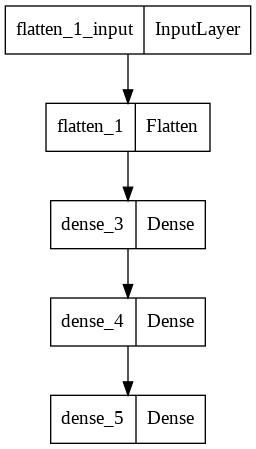

In [ ]:
#INTERPRETACIÓN GRÁFICA DEL MODELO
keras.utils.plot_model(model)

In [ ]:
# COMPILACION DEL MODELO
model.compile(loss = "sparse_categorical_crossentropy", #COMO SE EVALUA EL DESEMPEÑO
             optimizer="sgd", # ALGORITMO DE OPTIMIZACIÓN
             metrics=["accuracy"]) # METRICAS ADICIONALES PARA EL REPORTE DE DESEMPEÑO

In [ ]:
# PROCEDE ENTRENAMIENTO DEL MODELO
with tf.device('/CPU:0'):
    model_history = model.fit(training[0],training[1],epochs=2,batch_size = 1,
                         validation_data=(testing[0],testing[1]))

Epoch 1/2
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 2/2
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000


In [ ]:
#EVALUA EL MODELO EN EL CONJUNTO DE PRUEBA
model.evaluate(X_test,y_test)

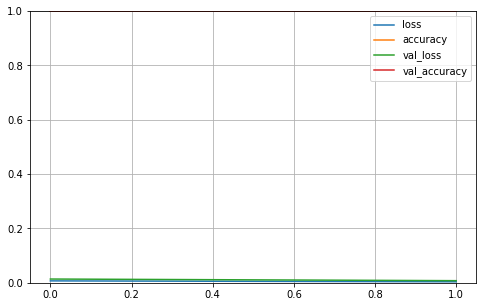

In [ ]:
#IMPRIME EVOLUCIÓN DEL ENTRENAMIENTO
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# GUARDA Y RECUPERA MODELOS

In [ ]:
#GUARDA
model.save('modelo.h5')
#CARGA
#nmodel =  tf.keras.models.load_model('modelo.h5')

# Como se depreco el metodo predict_classes se reemplaza con

In [ ]:
def predict_classes(a):
    f,c = a.shape
    clasx = np.zeros(f)
    for i in range(f):
       aux = a[i,:] 
       clasx[i]=np.where(aux == aux.max())[0][0]  
    return clasx.astype(int)

In [ ]:
# HACIENDO PREDICCIONES EN CONJUNTO REDUCIDO
X_new = X_test[:3]
y_proba = model.predict(X_new)
#IMPRIME PROBABILIDADES
print(y_proba)
#PREDICE E IMPRIME INDICES DE ETIQUETAS
y_pred = predict_classes(y_proba)
print(y_pred)
#CONVIERTE DE INDICE A ETIQUETA
etiquetas = np.array(class_names)[y_pred]
print(etiquetas)

NameError: ignored

# VERIFICANDO PREDICCIONES

In [ ]:
print(plt.imshow(X_test[0]))
print(f'Clase: {etiquetas[0]}')

In [ ]:
print(plt.imshow(X_test[1]))
print(f'Clase: {etiquetas[1]}')

In [ ]:
print(plt.imshow(X_test[2]))
print(f'Clase: {etiquetas[2]}')